<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [7]:
import json 
# Define the file path for the JSON file
json_file_path = 'dataset_1.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path, 'r') as json_file:
    boolean_list_out = json.load(json_file)
    
    
print(boolean_list_out)

[True, False, False, True, True, True, False, True, False, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, False, False, False, False, True, False, False, True, False, True, True, False, True, True, True, True, False, False, True, False, False, True, True, False, True, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, True, False, False, False, True, True, False, True, True, False, True, False, True, True, True, False, False, True, False, False, False, True, True, False, False, True, False, True, True, True, False, False, False, True, False, True, True, False, True, True, True, True, True, True, False, False, True, True, False, False, False, False, False, True, False, False, True, True, True, False, False, False, False, True, True, True, True, True, False, False, False, True, False, True, True, False, False, False, False, False, False, True, False, False, 

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



Summary for dataset_1.json:
Mean of the posterior distribution: 0.39243027888446214
Variance of the posterior distribution: 0.00047401342962052765


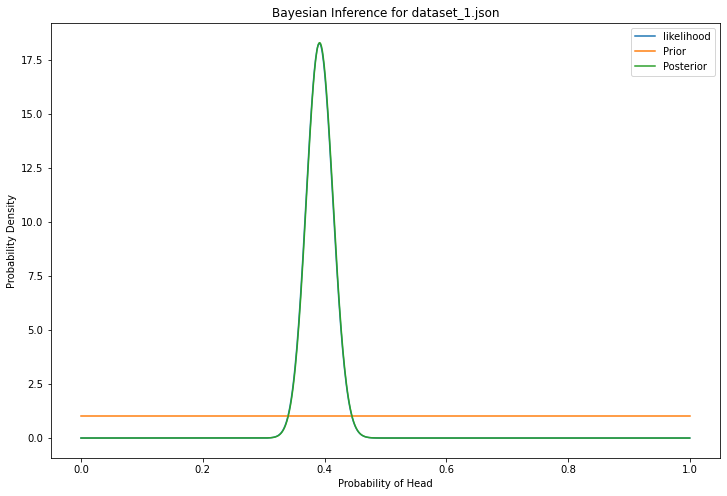

Summary for dataset_2.json:
Mean of the posterior distribution: 0.4063745019920319
Variance of the posterior distribution: 0.0004795909863275546


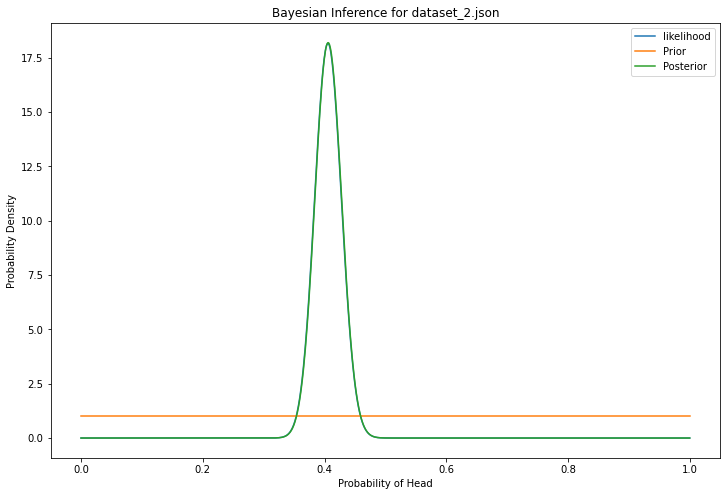

Summary for dataset_3.json:
Mean of the posterior distribution: 0.2848605577689243
Variance of the posterior distribution: 0.00040500004054970506


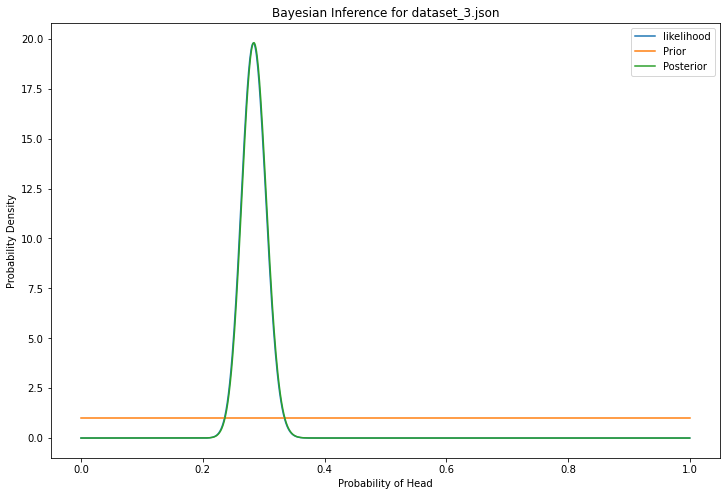

'--------------------Write your code above this line------------------------------'

In [168]:
import numpy as np
import matplotlib.pyplot as plt

'''--------------------Write your code below this line------------------------------'''
from scipy.special import comb
from scipy.stats import binom
import pandas as pd
from scipy.stats import beta

def load_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

def bayesian_inference(data):
    
    data = np.array([int(value) for value in data])

    num_h = np.sum(data)
    num_t = len(data) - num_h
    
    prior_alpha = 1
    prior_beta = 1
    
    posterior_alpha = prior_alpha + num_h
    posterior_beta = prior_beta + num_t
    
    x = np.linspace(0, 1, 1000)
    
    likelihood = beta.pdf(x, num_h, num_t)
    prior = beta.pdf(x, prior_alpha, prior_beta)
    posterior = beta.pdf(x, posterior_alpha, posterior_beta)
    
    posterior_mean = posterior_alpha / (posterior_alpha + posterior_beta)
    posterior_variance = (posterior_alpha * posterior_beta) / \
                        ((posterior_alpha + posterior_beta) ** 2 * (posterior_alpha + posterior_beta + 1))

    
    return x, likelihood, prior, posterior, posterior_mean, posterior_variance

json_files = ['dataset_1.json', 'dataset_2.json', 'dataset_3.json']

for file in json_files:
    plt.figure(figsize=(12, 8))
    data = load_data(file)
    x, likelihood, prior, posterior, mean, variance = bayesian_inference(data)
    plt.plot(x, likelihood, label = 'likelihood')
    
    plt.plot(x, prior, label='Prior')
    plt.plot(x, posterior, label='Posterior')
    plt.title(f'Bayesian Inference for {file}')
    plt.xlabel('Probability of Head')
    plt.ylabel('Probability Density')
    plt.legend()

    max_prob = x[np.argmax(posterior)]
    print(f'Summary for {file}:')
    print(f'Mean of the posterior distribution: {mean}')
    print(f'Variance of the posterior distribution: {variance}')

    plt.show()









       



'''--------------------Write your code above this line------------------------------'''



<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>


## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

C:\Users\Brian\AppData\Local\Temp/ipykernel_19852/899809481.py:9: RuntimeWarning: divide by zero encountered in log
  stirling_values = [N * np.log(N) - N + 0.5 * np.log(2 * np.pi * N) for N in N_values]
C:\Users\Brian\AppData\Local\Temp/ipykernel_19852/899809481.py:9: RuntimeWarning: invalid value encountered in double_scalars
  stirling_values = [N * np.log(N) - N + 0.5 * np.log(2 * np.pi * N) for N in N_values]
No handles with labels found to put in legend.


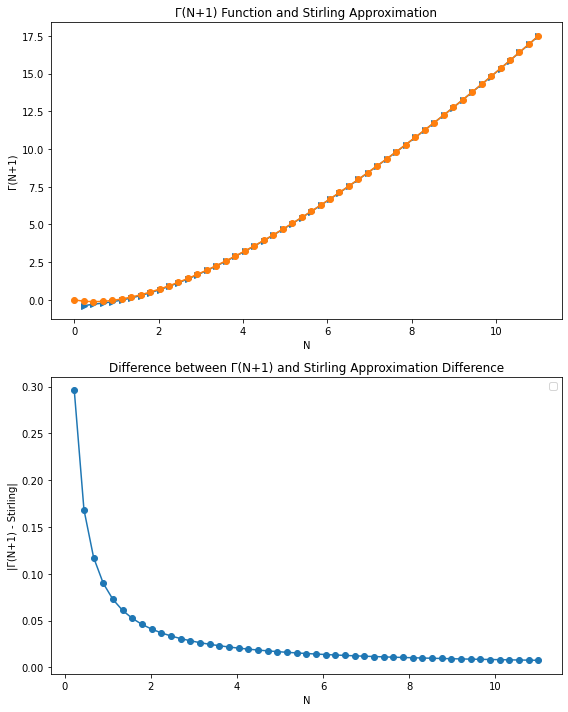

n = 10:
Log(n!) = [0.0, 0.6931471805599453, 1.791759469228055, 3.1780538303479453, 4.787491742782046, 6.579251212010101, 8.525161361065415, 10.60460290274525, 12.80182748008147, 15.104412573075518]
Log(Stirling Approximation) = [nan, -0.38788469941951276, -0.2899628908970099, -0.2184182495920296, -0.12948392592138924, -0.016096680546620723, 0.12208174084507695, 0.28376486095814835, 0.4673182901710551, 0.6711323020813964, 0.8937299434740746, 1.1337889619644614, 1.3901349460710803, 1.6617257910619079, 1.9476347845941824, 2.2470348763107197, 2.559184884918322, 2.8834177049260505, 3.2191303291214, 3.5657754357547153, 3.922854292288431, 4.289910755062901, 4.66652617757763, 5.052315071902386, 5.446921395506641, 5.850015359061928, 6.261290669862114, 6.6804621410108265, 7.107263609060391, 7.54144611291067, 7.982776294960576, 8.43103499213715, 8.886015989817585, 9.347524916056955, 9.815378257135414, 10.289402478399488, 10.769433236816724, 11.255314673689252, 11.746898777658805, 12.2440448095452

'--------------------Write your code above this line------------------------------'

In [182]:

'''--------------------Write your code below this line------------------------------'''
import math 
from scipy.special import gamma


N_values = np.linspace(0, 11)

gamma_values = [np.log(gamma(N + 1)) for N in N_values]
stirling_values = [N * np.log(N) - N + 0.5 * np.log(2 * np.pi * N) for N in N_values]

difference_values = np.abs(np.array(gamma_values) - np.array(stirling_values))


fig, axes = plt.subplots(2, 1, figsize=(8, 10)) 

axes[0].plot(N_values, stirling_values, marker='>', linestyle='-')
axes[0].plot(N_values, gamma_values, marker='o', linestyle='-')
axes[0].set_xlabel('N')
axes[0].set_ylabel('Γ(N+1)')
axes[0].set_title('Γ(N+1) Function and Stirling Approximation')

axes[1].plot(N_values, difference_values, marker='o', linestyle='-')
axes[1].set_xlabel('N')
axes[1].set_ylabel('|Γ(N+1) - Stirling|')
axes[1].set_title('Difference between Γ(N+1) and Stirling Approximation Difference')

plt.legend()

plt.tight_layout()


plt.show()










print(f'n = {n}:')
print(f'Log(n!) = {log_exact_factorial}')
print(f'Log(Stirling Approximation) = {stirling_values}')
 

'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
'' **write you answer above**''
<br> <br> 
What is the $p_{\rm max}$ for the above three datasets? 
''**write you answer below**''
<br>**Data set 1:**<br> **Data set 2:** <br>**Data set 3:**
<br>
'' **write you answer above**''

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

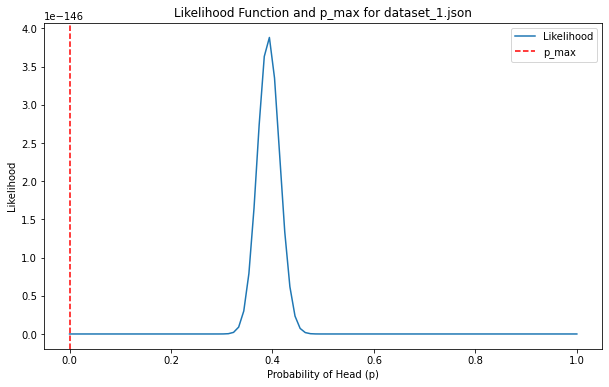

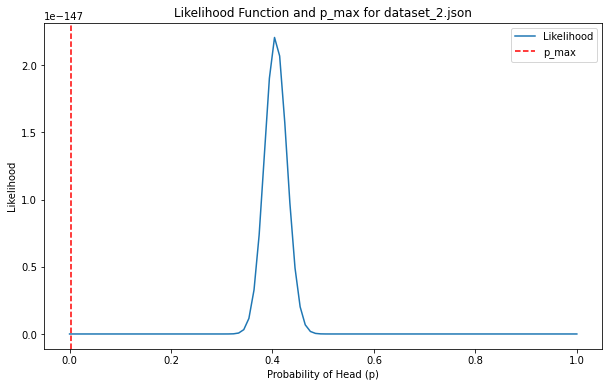

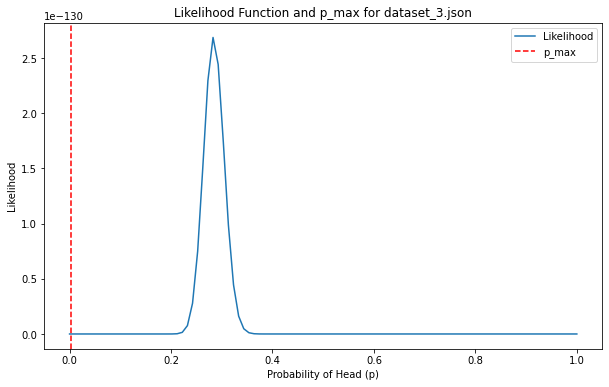

'--------------------Write your code above this line------------------------------'

In [172]:


'''--------------------Write your code below this line------------------------------'''
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def load_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

def mle(data):
    data = np.array([int(value) for value in data])
    
    mle_function = np.mean(data)
    
    return mle_function

json_files = ['dataset_1.json', 'dataset_2.json', 'dataset_3.json']

mle_values = []
p_max_values = []

for file in json_files:
    data = load_data(file)
    
    mle_function = mle(data)
    mle_values.append(mle_function)

    
    p_max = np.argmax(mle_values) / len(data) 
    p_max_values.append(p_max)
    
    p_range = np.linspace(0, 1, 100)
    
    likelihood = [np.prod([(p**int(value) * (1-p)**(1-int(value))) for value in data]) for p in p_range]
    
    plt.figure(figsize=(10, 6))
    plt.plot(p_range, likelihood, label='Likelihood')
    plt.axvline(x=p_max, color='red', linestyle='--', label='p_max')
    plt.title(f'Likelihood Function and p_max for {file}')
    plt.xlabel('Probability of Head (p)')
    plt.ylabel('Likelihood')
    plt.legend()
    
    plt.show()
    
'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

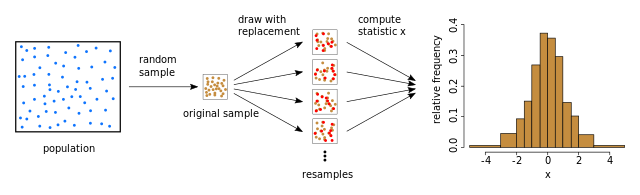
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



Data Set 1, Sample Size = 5:
  Expectation Value: 0.4040
  Variance: 0.1976

Data Set 1, Sample Size = 15:
  Expectation Value: 0.4073
  Variance: 0.2254

Data Set 1, Sample Size = 40:
  Expectation Value: 0.3845
  Variance: 0.2314

Data Set 1, Sample Size = 60:
  Expectation Value: 0.3805
  Variance: 0.2318

Data Set 1, Sample Size = 90:
  Expectation Value: 0.3934
  Variance: 0.2362

Data Set 1, Sample Size = 150:
  Expectation Value: 0.3913
  Variance: 0.2370

Data Set 1, Sample Size = 210:
  Expectation Value: 0.3918
  Variance: 0.2369

Data Set 1, Sample Size = 300:
  Expectation Value: 0.3940
  Variance: 0.2380

Data Set 1, Sample Size = 400:
  Expectation Value: 0.3907
  Variance: 0.2375

Data Set 2, Sample Size = 5:
  Expectation Value: 0.4060
  Variance: 0.1952

Data Set 2, Sample Size = 15:
  Expectation Value: 0.3987
  Variance: 0.2246

Data Set 2, Sample Size = 40:
  Expectation Value: 0.4007
  Variance: 0.2345

Data Set 2, Sample Size = 60:
  Expectation Value: 0.3952
  Va

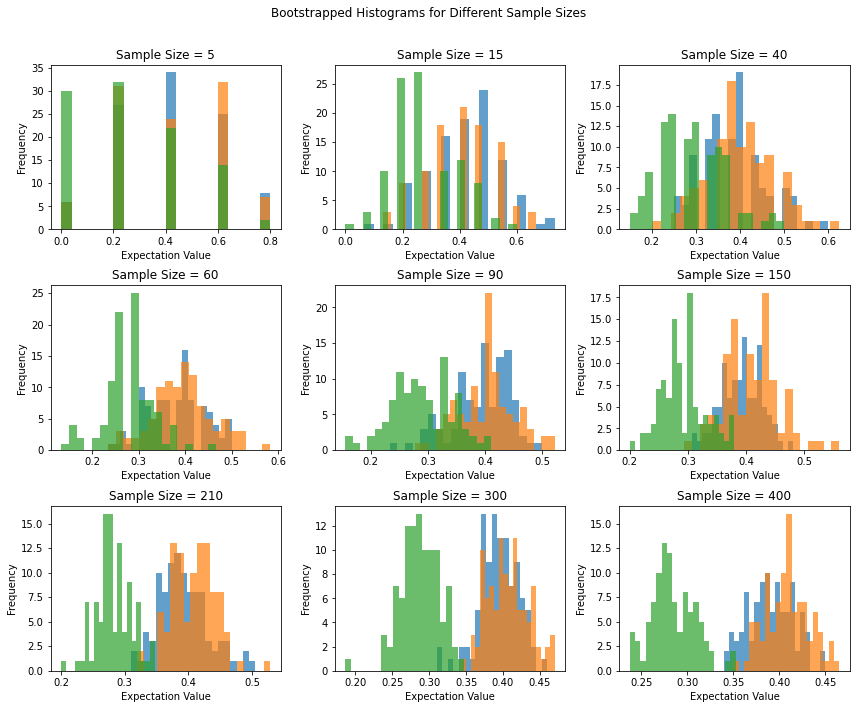

'--------------------Write your code above this line------------------------------'

In [113]:
'''--------------------Write your code below this line------------------------------'''

def bootstrap(data, num_samples, sample_size):
    expectations= []
    variances= []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_expectation = np.mean(sample)
        sample_variance = np.var(sample)
        expectations.append(sample_expectation)
        variances.append(sample_variance)
    return expectations, variances

data_files = ['dataset_1.json', 'dataset_2.json', 'dataset_3.json']
data_sets = []

for data_file in data_files:
    with open(data_file, 'r') as f:
        data = json.load(f)
        data_sets.append(data)
        
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]

num_bootstrap_samples = 100

fig, axes = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Bootstrapped Histograms for Different Sample Sizes')

for data_idx, data in enumerate(data_sets):
    for i, sample_size in enumerate(sample_sizes):
        row = i // 3
        col = i % 3

        expectations, variances = bootstrap(data, num_bootstrap_samples, sample_size)


        axes[row, col].hist(expectations, bins=20, alpha=0.7)
        axes[row, col].set_title(f'Sample Size = {sample_size}')
        axes[row, col].set_xlabel('Expectation Value')
        axes[row, col].set_ylabel('Frequency')

        avg_expectation = np.mean(expectations)
        avg_variance = np.mean(variances)
        print(f'Data Set {data_idx + 1}, Sample Size = {sample_size}:')
        print(f'  Expectation Value: {avg_expectation:.4f}')
        print(f'  Variance: {avg_variance:.4f}\n')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

'''--------------------Write your code above this line------------------------------'''

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

In [ ]:


'''--------------------Write your code below this line------------------------------'''




'''--------------------Write your code above this line------------------------------'''


<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [139]:
import numpy as np
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''

import math

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant
        self.Z = math.exp(-1 / decay_constant)

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            return (1 / (self.Z * self.decay_constant)) * math.exp(-x / self.decay_constant)

decay_constant = 5
particle = Particle(decay_constant)

position = 2
pdf_value = particle.pdf_decay(position)

# Print the result
print(f"PDF at position {position} = {pdf_value:.4f}")

'''--------------------Write your code above this line------------------------------'''

PDF at position 2 = 0.1637


'--------------------Write your code above this line------------------------------'

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

'--------------------Write your code above this line------------------------------'

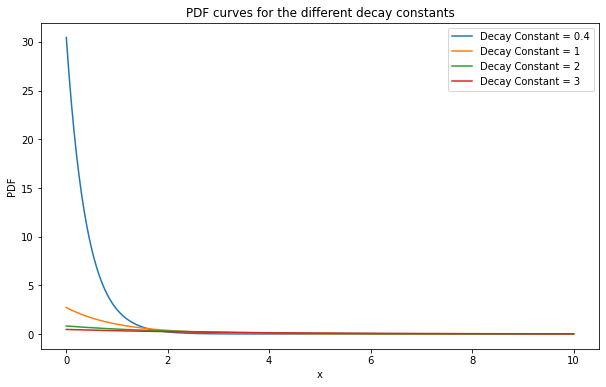

In [131]:


'''--------------------Write your code below this line------------------------------'''
import math

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant
        self.Z = math.exp(-1 / decay_constant)

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            return (1 / (self.Z * self.decay_constant)) * math.exp(-x / self.decay_constant)




decay_constants = [0.4, 1, 2, 3]

particles = [Particle(decay_constant) for decay_constant in decay_constants]

x_values = np.linspace(0, 10, 400)

plt.figure(figsize=(10,6))

for particle in particles:
    pdf_curve = [particle.pdf_decay(x) for x in x_values]
    plt.plot(x_values, pdf_curve, label = f'Decay Constant = {particle.decay_constant}')
    

plt.legend()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF curves for the different decay constants')
'''--------------------Write your code above this line------------------------------'''

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

'--------------------Write your code above this line------------------------------'

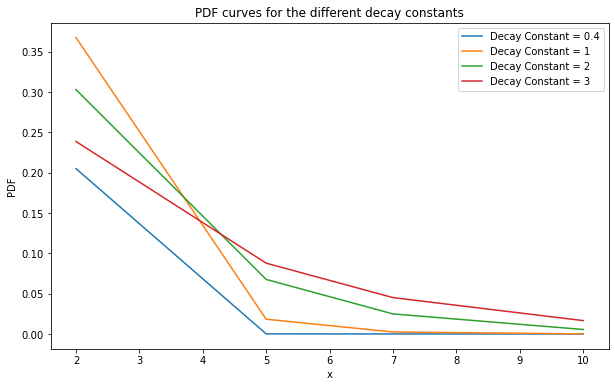

In [147]:

'''--------------------Write your code below this line------------------------------'''

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant
        self.Z = math.exp(-1 / decay_constant)

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            return (1 / (self.Z * self.decay_constant)) * math.exp(-x / self.decay_constant)
    def pdf_fixed_p(self, fixed_positions):
        return [self.pdf_decay(position) for position in fixed_positions]



fixed_positions = [2, 5, 7, 10]
decay_constants = [0.4, 1, 2, 3]

particles = [Particle(decay_constant) for decay_constant in decay_constants]


plt.figure(figsize=(10,6))

for particle in particles:
    pdf_curve = particle.pdf_fixed_p(fixed_positions)
    plt.plot(fixed_positions, pdf_curve, label = f'Decay Constant = {particle.decay_constant}')
    

plt.legend()
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('PDF curves for the different decay constants')

'''--------------------Write your code above this line------------------------------'''

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


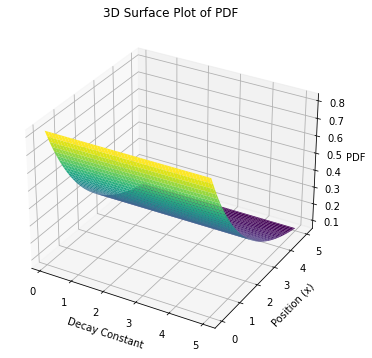

'--------------------Write your code above this line------------------------------'

<Figure size 432x288 with 0 Axes>

In [161]:
# Import packages for making a 3D plot
from mpl_toolkits.mplot3d import Axes3D


'''--------------------Write your code below this line------------------------------'''
class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant
        self.Z = math.exp(-1 / decay_constant)

    def pdf_decay(self, x):
        if x < 0:
            return 0
        else:
            return (1 / (self.Z * self.decay_constant)) * math.exp(-x / self.decay_constant)
    def pdf_fixed_p(self, fixed_positions):
        return [self.pdf_decay(position) for position in fixed_positions]
    
    def generate_3d_surface(self, x_range, decay_constant_range):
        pdf_values = np.zeros((len(x_range), len(decay_constant_range)))

        for i, x in enumerate(x_range):
            for j, decay_constant in enumerate(decay_constant_range):
                pdf_values[i, j] = self.pdf_decay(x)

        X, Y = np.meshgrid(decay_constant_range, x_range)

        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')

        ax.plot_surface(X, Y, pdf_values, cmap='viridis')

        ax.set_xlabel('Decay Constant')
        ax.set_ylabel('Position (x)')
        ax.set_zlabel('PDF')
        ax.set_title('3D Surface Plot of PDF')

        plt.show()
        
        plt.savefig(output_path, format = '.png')


        
decay_constant=2
fixed_positions=[0,1,2,3,4,5]

output_dir = 'Downloads'

output_filename = f'particle_{particle.decay_constant}.png'

output_path = output_dir + output_filename

particle = Particle(decay_constant)

x_range = np.linspace(0, 5, 100)
decay_constant_range = np.linspace(0.1, 5, 100)

particle.generate_3d_surface(x_range, decay_constant_range)

'''--------------------Write your code above this line------------------------------'''

In [152]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''




'''--------------------Write your code above this line------------------------------'''

'--------------------Write your code above this line------------------------------'

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




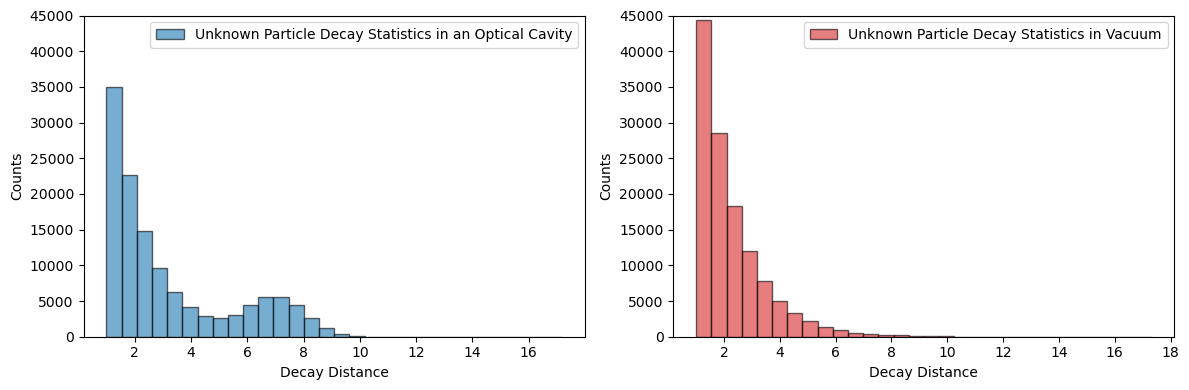

## E)
ou can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

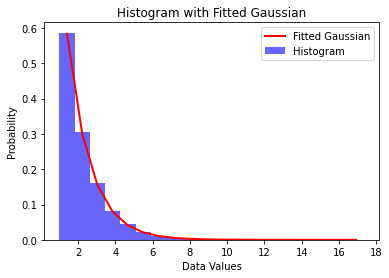

Optimized Decay Constant: 1.2293466322847477


'--------------------Write your code above this line------------------------------'

In [200]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


'''--------------------Write your code below this line------------------------------'''
from scipy.optimize import curve_fit

def pdf_decay(x, decay_constant):
    pdf_decay = (1 / ( np.exp(-1/ decay_constant)* decay_constant)) * np.exp(-x / decay_constant)
    return pdf_decay
    

def gaussian_distribution(x, mu, sigma, A):
    return A* (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def load_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

json_file = 'Vacuum_decay_dataset.json'

data = load_data(json_file)

data_values = np.array(data)

hist, bin_edges = np.histogram(data, bins=20, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [1.0]

params, covariance = curve_fit(pdf_decay, bin_centers, hist, p0=initial_guess)

decay_constant = params[0]

    
plt.figure()
plt.hist(data_values, bins=20, density=True, alpha=0.6, color='b', label='Histogram')
plt.plot(bin_centers, pdf_decay(bin_centers, decay_constant), 'r-', lw=2, label='Fitted Gaussian')
plt.legend()
plt.xlabel('Data Values')
plt.ylabel('Probability')
plt.title('Histogram with Fitted Gaussian')
plt.show()

print("Optimized Decay Constant:", decay_constant)


'''--------------------Write your code above this line------------------------------'''

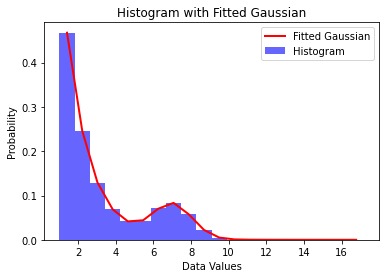

Optimized Decay Constant: 1.2589286600707095
Optimized mu: 7.0031569950868535
Optimized sigma: 1.033534216404437


In [217]:
def pdf_decay(x, decay_constant):
    pdf_decay = (1 / ( np.exp(-1/ decay_constant)* decay_constant)) * np.exp(-x / decay_constant)
    return pdf_decay
    

def gaussian_distribution(x, mu, sigma, A):
    return A* (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

def gaussian_dis_pdf_decay(x, mu, sigma, decay_constant, A, B):
    return A* (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2) + B* (1 / ( np.exp(-1/ decay_constant)* decay_constant)) * np.exp(-x / decay_constant)

def load_data(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

json_file = 'Cavity_decay_dataset.json'

data = load_data(json_file)

data_values = np.array(data)


hist, bin_edges = np.histogram(data, bins=20, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [1.0, 8.0, 3.0, 1.0, 2.0]

params, covariance = curve_fit(gaussian_dis_pdf_decay, bin_centers, hist, p0=initial_guess)

mu, sigma, decay_constant, A, B = params

    
plt.figure()
plt.hist(data_values, bins=20, density=True, alpha=0.6, color='b', label='Histogram')
plt.plot(bin_centers, gaussian_dis_pdf_decay(bin_centers, mu, sigma, decay_constant, A, B), 'r-', lw=2, label='Fitted Gaussian')
plt.legend()
plt.xlabel('Data Values')
plt.ylabel('Probability')
plt.title('Histogram with Fitted Gaussian')
plt.show()

print("Optimized Decay Constant:", decay_constant)

print("Optimized mu:", mu)

print("Optimized sigma:", sigma)

<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>

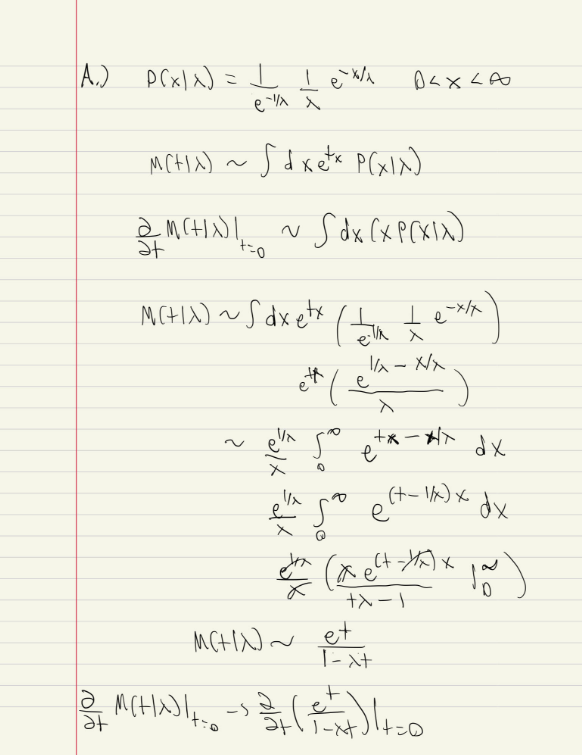

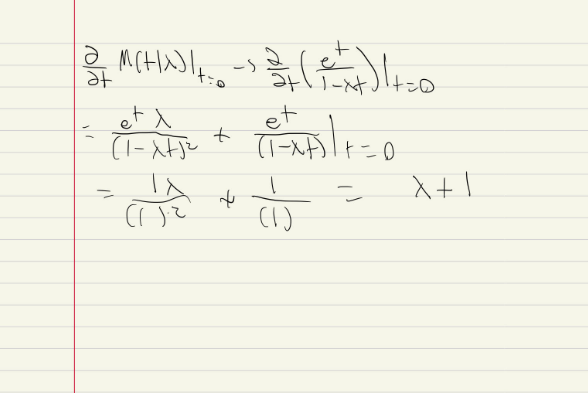



'' **write you answer above**''
<br> <br> 

## B) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>

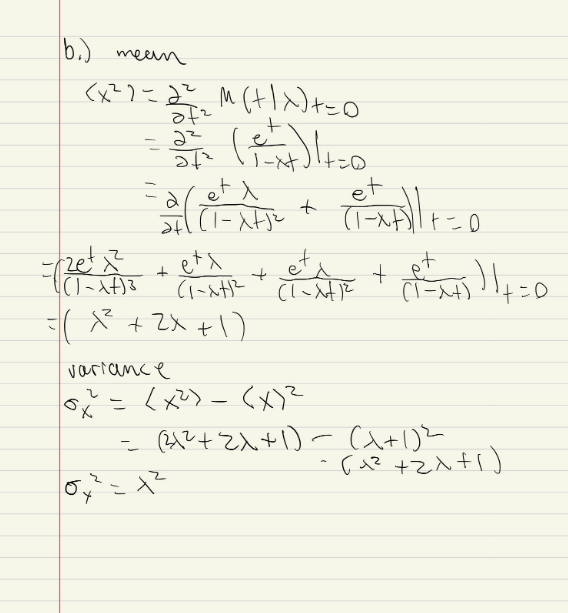
'' **write you answer above**''
<br> <br> 

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

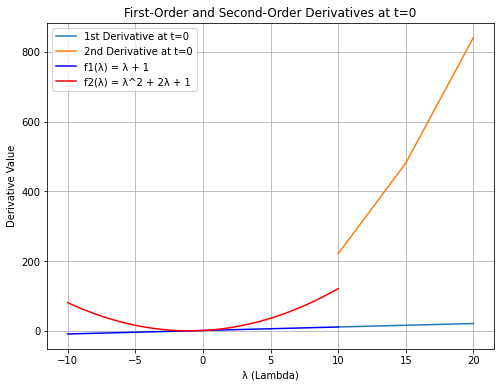

'--------------------Write your code above this line------------------------------'

In [231]:


'''--------------------Write your code below this line------------------------------'''

import sympy as sp

t, lambda_val = sp.symbols('t lambda')
func = sp.exp(t) / (1 - lambda_val * t)

first_derivative = sp.diff(func, t)

second_derivative = sp.diff(first_derivative, t)

first_derivative_func = sp.lambdify((t, lambda_val), first_derivative, 'numpy')
second_derivative_func = sp.lambdify((t, lambda_val), second_derivative, 'numpy')




t_value = 0

lambda_values = [10, 15, 20]  

lambda_value = np.linspace(-10, 10, 100)

first_order_values = [first_derivative_func(t_value, lambda_val) for lambda_val in lambda_values]
second_order_values = [second_derivative_func(t_value, lambda_val) for lambda_val in lambda_values]


f1_values = lambda_value + 1
f2_values = lambda_value**2 + 2 * lambda_value + 1

plt.figure(figsize=(8, 6))
plt.plot(lambda_values, first_order_values, label='1st Derivative at t=0')
plt.plot(lambda_values, second_order_values, label='2nd Derivative at t=0')

plt.plot(lambda_value, f1_values, label='f1(λ) = λ + 1', color='blue')
plt.plot(lambda_value, f2_values, label='f2(λ) = λ^2 + 2λ + 1', color='red')

plt.xlabel('λ (Lambda)')
plt.ylabel('Derivative Value')
plt.legend()
plt.title('First-Order and Second-Order Derivatives at t=0')
plt.grid(True)
plt.show()



'''--------------------Write your code above this line------------------------------'''

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
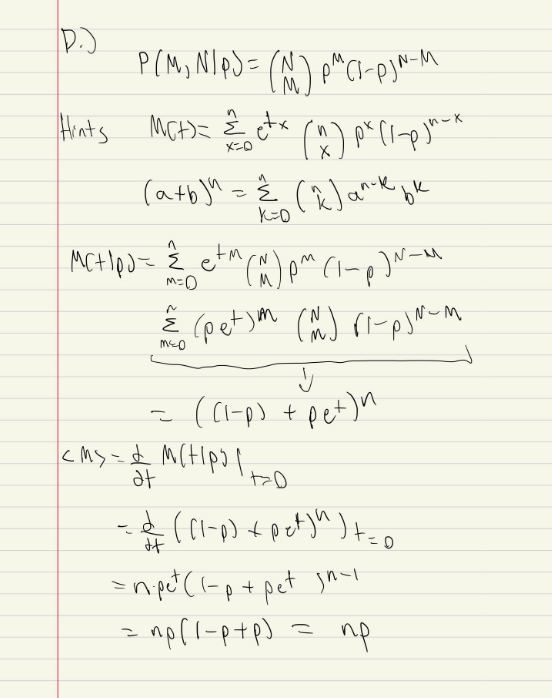


'' **write you answer above**''
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 
''**write you answer below**''
<br><br> **Steps:** <br>
<br>
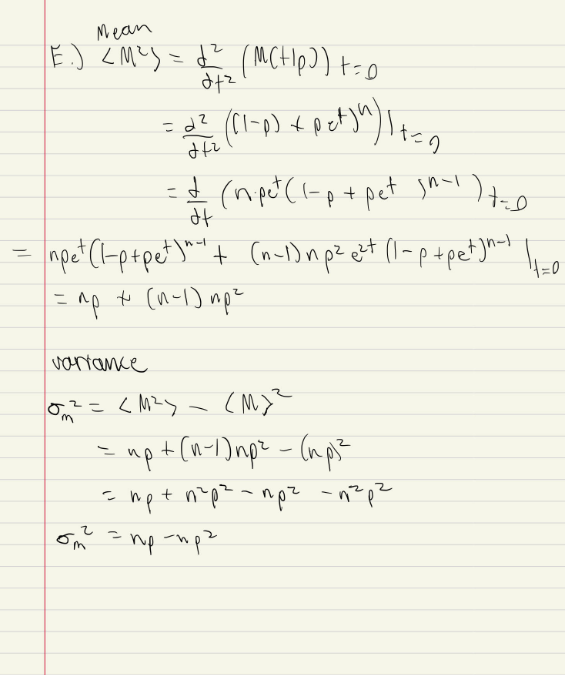


'' **write you answer above**''
<br> <br> 

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

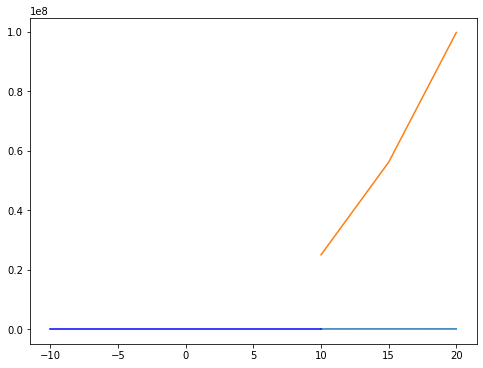

In [234]:


'''--------------------Write your code below this line------------------------------'''

import sympy as sp

t, lambda_val = sp.symbols('t lambda')
func = (1 - lambda_val + lambda_val * sp.exp(t))**n

first_derivative = sp.diff(func, t)

second_derivative = sp.diff(first_derivative, t)

first_derivative_func = sp.lambdify((t, lambda_val), first_derivative, 'numpy')
second_derivative_func = sp.lambdify((t, lambda_val), second_derivative, 'numpy')

n=100


t_value = 0

lambda_values = [10, 15, 20]  

lambda_value = np.linspace(-10, 10, 100)

first_order_values = [first_derivative_func(t_value, lambda_val) for lambda_val in lambda_values]
second_order_values = [second_derivative_func(t_value, lambda_val) for lambda_val in lambda_values]


f1_values = lambda_value * n
f2_values = n*lambda_val - n*lambda_val**2

plt.figure(figsize=(8, 6))
plt.plot(lambda_values, first_order_values, label='1st Derivative at t=0')
plt.plot(lambda_values, second_order_values, label='2nd Derivative at t=0')

plt.plot(lambda_value, f1_values, label='f1(λ)', color='blue')
plt.plot(lambda_value, f2_values, label='f2(λ)', color='red')

plt.xlabel('λ (Lambda)')
plt.ylabel('Derivative Value')
plt.legend()
plt.title('First-Order and Second-Order Derivatives at t=0')
plt.grid(True)
plt.show()




'''--------------------Write your code above this line------------------------------'''